In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.special import expit
from decimal import *

In [2]:
getcontext().prec = 10
data = load_digits()

In [3]:
import numpy as np
import random
import numpy.random
import math
np.seterr(over='raise')
np.seterr(divide='raise', invalid='raise')

{'divide': 'warn', 'over': 'raise', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
train = np.array(list(zip(data["data"],data["target"])))

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline


7


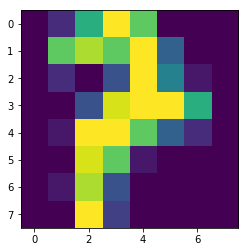

In [7]:
rand = np.random.randint(0,high = len(train) -1)

img, real = train[rand]
func = lambda x: np.array(np.array_split(x,8))
plt.imshow(func(img))
print(real)

In [8]:
import pandas as pd
df = pd.DataFrame(train)
df = shuffle(df)
imgs = df[0]
labels = df[1]
#print(df[1])

In [9]:
trainImgs = []
trainLabels = []
testImgs = []
testLabels = []

for i in range(len(df)):
    if i < len(df)*0.80:
        trainImgs.append(imgs[i])
        trainLabels.append(labels[i])
    if i >= len(df)*0.80:
        testImgs.append(imgs[i])
        testLabels.append(labels[i])
        
#print(trainImgs[0])
#print(np.shape(trainImgs[0]))
       
#print(len(imgs))
#print(len(trainImgs))
#print(len(testImgs))
#print(len(trainImgs[0]))

reshapedTrainImgs = []
reshapedTestImgs = []

for i in range(len(trainImgs)):
    reshapedTrainImgs.append(func(trainImgs[i]))
for i in range(len(testImgs)):
    reshapedTestImgs.append(func(testImgs[i]))

2


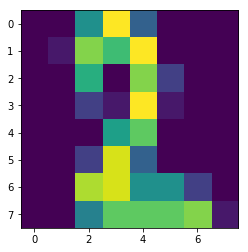

In [10]:
aTrainImg = 22
plt.imshow(reshapedTrainImgs[aTrainImg])
print(trainLabels[aTrainImg])

9


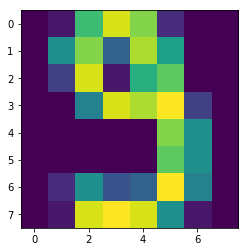

In [11]:
aTestImg = 8
plt.imshow(reshapedTestImgs[aTestImg])
print(testLabels[aTestImg])

In [12]:
class NeuralNet():
    def __init__(self, inputArr, outputArr, initialize = False):
        self.inputLayerSize = 64
        self.outputLayerSize = 10
        self.hiddenLayer1Size = 50
        self.hiddenLayer2Size = 50
        self.X = inputArr
        self.Y = outputArr
        self.isInitialized = initialize
        
        if self.isInitialized == False:
            self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayer1Size)
            #print("These are the W1's")
            #print(self.W1)
            self.W2 = np.random.randn(self.hiddenLayer1Size,self.hiddenLayer2Size)
            #print("These are the W2's")
            #print(self.W2)
            self.W3 = np.random.randn(self.hiddenLayer2Size,self.outputLayerSize)
            #print("These are the W2's")
            #print(self.W2)
            self.isInitialized = True
        
    def forward(self, X):
        
        #print("This is X")
        #print(X)
        '''
        print("This is self.W1")
        print(self.W1)
        '''
        self.z2 = np.dot(X, self.W1)
        #print("This is z2")
        #print(self.z2)
        
        self.a2 = self.sigmoid(self.z2)
        '''
        print("This is self.a2")
        print(self.a2)
        print("This is self.W2")
        print(self.W2)
        '''
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.sigmoid(self.z3)
        
        
        self.z4 = np.dot(self.a3, self.W3)
        #print("This is self.z3")
        #print(self.z3)
        yHat = self.sigmoid(self.z4)
        #print("This is yHat")
        #print(yHat)
        return yHat
    
    def sigmoid(self, z):
        np.clip(-5, 5, z)
        #print("This is z")
        #print(z)
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        
        #print("This is X")
        #print(X)
        self.yHat = self.forward(X)
        '''
        print("This is y")
        print(y)
        print("This is yHat")
        print(self.yHat)
        '''
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        
        delta4 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)

        '''
        print("This is y")
        print(y)
        print("This is yHat")
        print(self.yHat)
        print("This is sigmoidPrime(self.z3)")
        print(self.sigmoidPrime(self.z3))
        '''

        delta3 = np.dot(delta4, self.W3.T)*self.sigmoidPrime(self.z3)
        dJdW2 = np.dot(self.a2.T, delta3)

        '''
        print("This is delta3")
        print(delta3)
        print("This is W2 trans")
        print(self.W2.T)
        print("This is sigmoidPrime(self.z2)")
        print(self.sigmoidPrime(self.z2))
        '''

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(np.array(X).T, delta2)  
        
        #self.W1 -= 0.01*dJdW1
        #self.W2 -= 0.01*dJdW2
        
        return dJdW1, dJdW2, dJdW3


In [13]:
class TrainObject():
    def __init__(self, inputImg, inputLabel):
        self.img = inputImg
        self.label = inputLabel

In [14]:
miniBatchSize = 32
learningRate = 0.055 
numberOfMiniBatches = math.ceil(len(trainImgs)/miniBatchSize)
hasPartialLastMiniBatch = False
sizeOfPartialLastMiniBatch = 0

print("The length of the train imgs is")
print(len(trainImgs))
print("The length of the train imgs divided by the miniBatchSize is")
print(len(trainImgs)/miniBatchSize)
print("The num of mini batches is")
print(numberOfMiniBatches)

listOfTrainObjects = []
for i in range(len(trainImgs)):
    aTrainObject = TrainObject(trainImgs[i], trainLabels[i])
    listOfTrainObjects.append(aTrainObject)
    
numEpochs = 15
firstEverInitialize = False

for ep in range(numEpochs):
    
    npListOfTOs = np.array(listOfTrainObjects)
    #print(npListOfTOs[0].img)
    random.shuffle(npListOfTOs)
    #print(npListOfTOs[0].img)

    if len(trainImgs)/miniBatchSize - int(len(trainImgs)/miniBatchSize) != 0.0:
        hasPartialLastMiniBatch = True
        sizeOfPartialLastMiniBatch = len(trainImgs) % miniBatchSize

    '''
    print("Is there a last partial mini batch?")
    print(hasPartialLastMiniBatch)
    if hasPartialLastMiniBatch:
        print("The size of the last partial mini batch is")
        print(sizeOfPartialLastMiniBatch)
    '''

    miniBatches = []
    idx = 0
    for i in range(numberOfMiniBatches):
        if i == numberOfMiniBatches-1 and hasPartialLastMiniBatch:
            aMiniBatch = npListOfTOs[idx:idx+sizeOfPartialLastMiniBatch]
        else:
            aMiniBatch = npListOfTOs[idx:idx+miniBatchSize]
        idx += miniBatchSize
        miniBatches.append(aMiniBatch)

    #print(len(miniBatches))
    #print(len(miniBatches[0]))
    #print(len(miniBatches[len(miniBatches)-1]))

    costs = []

    for i in range(len(miniBatches)):
        aMiniBatch = miniBatches[i]
        miniBatchImgs = []
        miniBatchVecClassLabels = []
        sumOfdJdW1 = 0
        sumOfdJdW2 = 0
        sumOfdJdW3 = 0
        for j in range(len(aMiniBatch)):
            miniBatchImgs.append(aMiniBatch[j].img)
            #miniBatchVecClassLabels(aMiniBatch[j].label)
            arr = [0]*10
            arr[aMiniBatch[j].label] = 1
            miniBatchVecClassLabels.append(arr)
        if i == 0 and firstEverInitialize == False:
            NN = NeuralNet(miniBatchImgs, miniBatchVecClassLabels)
            firstEverInitialize = True
        else:
            NN.X = miniBatchImgs
            NN.Y = miniBatchVecClassLabels
        for i in range(len(aMiniBatch)):
            try:
                theSum = Decimal(sum(NN.costFunction(NN.X, NN.Y)))
                #print("This one was successful")
                #print(theSum)
                #numDeci = num_after_point(theSum)
                #print(numDeci)
                costs.append(theSum)
                dJdW1, dJdW2, dJdW3 = NN.costFunctionPrime(NN.X, NN.Y)
                sumOfdJdW1 += dJdW1
                sumOfdJdW2 += dJdW2
                sumOfdJdW3 += dJdW3
            except:
                pass
        avgdJdW1 = sumOfdJdW1/len(aMiniBatch)
        avgdJdW2 = sumOfdJdW2/len(aMiniBatch)
        avgdJdW3 = sumOfdJdW3/len(aMiniBatch)
        NN.W1 -= learningRate*avgdJdW1
        NN.W2 -= learningRate*avgdJdW2
        NN.W3 -= learningRate*avgdJdW3

    #print()
    #print(len(costs))
    #print(costs[0])
    #print("Epoch " + str(ep+1) + " started with a cost of " + str(costs[0]))
    #print("Epoch " + str(ep+1) + " ended with a cost of " + str(costs[len(costs)-1]))
    
    '''
    plt.plot(costs, label = "The cost curve")
    plt.ylabel('The Cost')
    plt.xlabel('Iteration')
    plt.legend()
    plt.show()
    '''
print("Done")


The length of the train imgs is
1438
The length of the train imgs divided by the miniBatchSize is
44.9375
The num of mini batches is
45
Done


In [15]:
#test the NN
numCorrect = 0
for i in range(len(testImgs)):
    aTestImg = i
    #plt.imshow(reshapedTestImgs[aTestImg])
    #print(testLabels[aTestImg])
    result = NN.forward(testImgs[aTestImg])
    #print("The actual is")
    #print(testLabels[aTestImg])
    #print("The result is")
    #print(result)
    highest = 0
    highestIndex = 0
    for i in range(len(result)):
        if result[i] > highest:
            highest = result[i]
            highestIndex = i
            #print("Found next highest at index " + str(i))
    #print("The label is")
    #print(highestIndex)
    if testLabels[aTestImg] == highestIndex:
        numCorrect += 1

print("Accuracy of the NN is")
print(numCorrect/len(testImgs))

#(60, 60, 15, 0.052, record holder = 0.889)
#(50, 50, 15, 0.052, consistent?)

Accuracy of the NN is
0.8495821727019499
